In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename= "C:/Users/HP/Documents/Data Science/auto.csv"

# DATA WRANGLING

In [3]:
#we know that our file has no headers so we will create headers ourselves
#CREATING HEADERS
headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df=pd.read_csv(filename, names=headers)

In [5]:
#display firs few rows to visualize
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#Detect missing values and handle them
df.replace("?", np.nan, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
#Based on the looks of data, we will adopt replacement techniques

#Replacing NaN with mean
#Calculating Averages

#Normalized losses
avg_norm_losses= df["normalized-losses"].astype("float").mean(axis=0)
print(avg_norm_losses)
avg_stroke= df["stroke"].astype("float").mean(axis=0)
print(avg_stroke)
avg_bore= df["bore"].astype("float").mean(axis=0)
print(avg_bore)
avg_horsepower= df["horsepower"].astype("float").mean(axis=0)
print(avg_horsepower)
avg_peak_rpm= df["peak-rpm"].astype("float").mean(axis=0)
print(avg_peak_rpm)

122.0
3.2554228855721337
3.3297512437810957
104.25615763546799
5125.369458128079


In [11]:
#Replacing NaN With averages
df["normalized-losses"].replace(np.nan, avg_norm_losses, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

In [12]:
# Replace by frequency
#number of doors

#calculating values present in particular columns
df["num-of-doors"].value_counts()


four    114
two      89
Name: num-of-doors, dtype: int64

In [13]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [14]:
#dropping the whole rows with nan in price column
df.dropna(subset=["price"], axis=0, inplace= True)

In [15]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
#Checking data types of each column 
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [17]:
#fixing data types where needed
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [18]:
df['city-L/100km']=235/df['city-mpg']
df['highway-mpg']=235/df['highway-mpg']
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [20]:
#Data Normalization
df["length"]= df["length"]/ df["length"].max()
df["height"]= df["height"]/ df["height"].max()
df["width"]= df["width"]/ df["width"].max()

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,lentgh
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,0.811148
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,0.811148
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,0.822681
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,0.848630
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,0.848630


In [22]:
del df["lentgh"]

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [24]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [28]:
#Binning
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [31]:
bins= np.linspace(min(df["horsepower"]), max(df["horsepower"]),4)

In [32]:
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [33]:
group_names=["low", "medium", "high"]
df["horsepower-binned"]= pd.cut(df["horsepower"], bins, labels= group_names, include_lowest= True)
df[["horsepower", "horsepower-binned"]].head(20)

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low
5,110,low
6,110,low
7,110,low
8,140,medium
10,101,low


In [34]:
df["horsepower-binned"].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

In [36]:
#Creating indicator variables for categorical variable
#Getting dummy variables for fuel type

dummy_variable_1= pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
dummy_variable_1.rename(columns={'diesel':'fuel-type-diesel', 'gas':'fuel-type-gas'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [38]:
#concatenate dummy variable 1 with the data frame
df=pd.concat([df, dummy_variable_1], axis=1)

#dropping the column fuel-type from df
df.drop("fuel-type", axis=1, inplace=True)

In [39]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,low,0,1


In [40]:
df["aspiration"].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [41]:
dummy_variable_2= pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
dummy_variable_2.rename(columns={'std':'aspiration-type-std', 'turbo': 'aspiration-type-turbo'}, inplace=True)
df=pd.concat([df, dummy_variable_2], axis=1)
df.drop("aspiration", axis=1, inplace = True )
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,low,0,1,1,0


# DATA ANALYSIS

In [43]:
#finding correlation between all variables (should be in int or float) 
#checking the data type first
df.dtypes

symboling                   int64
normalized-losses           int32
make                       object
num-of-doors               object
body-style                 object
drive-wheels               object
engine-location            object
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type                object
num-of-cylinders           object
engine-size                 int64
fuel-system                object
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                  int32
peak-rpm                  float64
city-mpg                    int64
highway-mpg               float64
price                     float64
city-L/100km              float64
horsepower-binned        category
fuel-type-diesel            uint8
fuel-type-gas               uint8
aspiration-type-std         uint8
aspiration-typ

In [44]:
#the correlation will be shown only for int and float type 

#check that the diaognal elements will always be 1
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


In [48]:
#findind correlation between specific variables
df[["bore", "stroke", "compression-ratio", "horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


In [49]:
! pip install seaborn

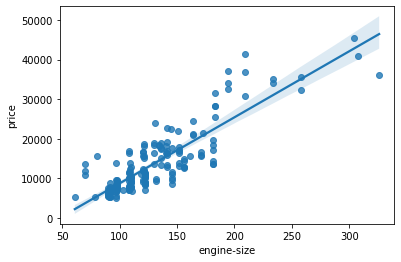

In [50]:
# continuous numerical variables
# Discovering linear relationsips using regression plots

#RELATIONSHIP BETWEEN ENGINE SIZE AND PRICE
#POSITIVE LINEAR RELATION

import seaborn as sns
sns.regplot(x='engine-size', y='price', data=df)

In [51]:
#the trend line in the plot above is almost diaognal showing a strong positive relationship between enginesize and price

#we can also have a numeric value quantifying the relation

df[["price", "engine-size"]].corr()

,price,engine-size
price,1.000000,0.872335
engine-size,0.872335,1.000000


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


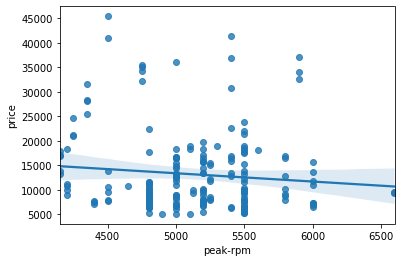

In [52]:
# the value is 0.87 which shows 87% strong positive relationship as was seen in the plot

#WEAK LINEAR RELATION
sns.regplot(x="peak-rpm", y="price", data=df)
df[["peak-rpm", "price"]].corr()


,city-mpg,price
city-mpg,1.000000,-0.686571
price,-0.686571,1.000000


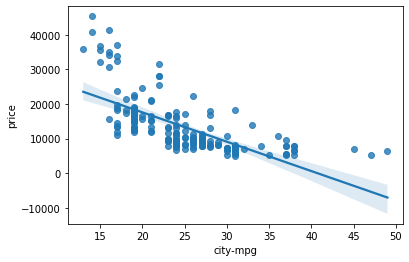

In [54]:
#NEGATIVE LINEAR RELATIONSHIP

sns.regplot(x="city-mpg", y="price", data=df)
df[["city-mpg", "price"]].corr()

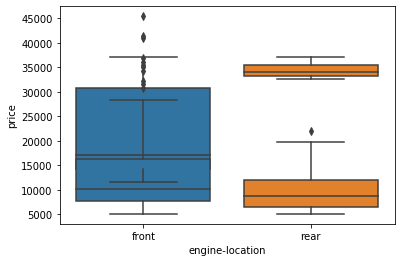

In [55]:
#CATEGORICAL VARIABLES
#BOXPLOTS
#BOXPLOT OF ENGINE LOCATION AND PRICE

sns.boxplot(x="engine-location", y="price", data=df)

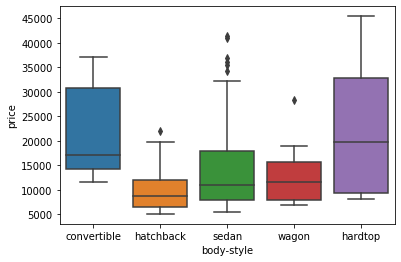

In [56]:
#BOXPLOT OF BODY-STYLE AND PRICE

sns.boxplot(x="body-style", y="price", data=df)

# DESCRIPTIVE STATISTICAL ANALYSIS

In [57]:
#In order to know the quick stats of the data in hand we will use describe method 
#It will ignore variables with type 'object' by default
#We will include the variables with type 'object' by using another line of code as shown below

df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [58]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [60]:
#we have seen method value_counts before
#we can convert the information given by value_counts to data frame

df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [62]:
df["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


# BASICS OF GROUPING

In [63]:
#USING GROUPBY
#group by method is used to group data in different categories
#it can be used to see the effect of different combinations of variables and their categories on the desribe variable that is price

#let's create first group

group_one= df[["drive-wheels", "body-style", "price"]]

#check the categories of each variable

df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [64]:
df["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [65]:
#first we will try to group by only one variable, drive-wheels
#this will tell the avergae price for each type of drive-wheel rwd, fwd, 4wd
group_one.groupby(['drive-wheels'], as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [71]:
#Now let's group by two different variables
group_one_test= df[["drive-wheels", "body-style", "price"]]
grouped_test= group_one_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

In [72]:
grouped_test

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [82]:
grouped_testing= group_one_test.groupby(['drive-wheels', 'body-style'], as_index=True).mean()
grouped_testing

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

In [76]:
#Converting to pivot table 
grouped_pivot=grouped_test.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [77]:
#filling missing values with zero
grouped_pivot=grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

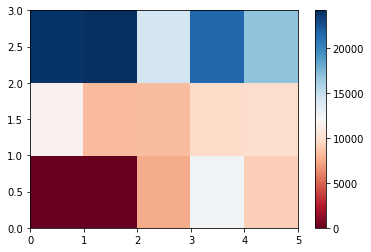

In [78]:
#Creating heatmap to visualize the relationship between body-style, drive-wheels and price

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [85]:
np.arange(grouped_pivot.shape[1])

array([0, 1, 2, 3, 4])

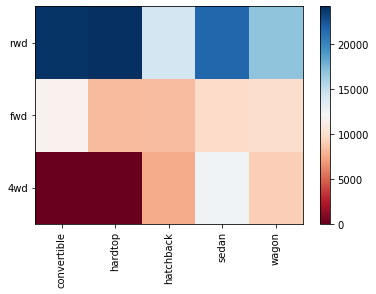

In [87]:
#The above heat map gives us no useful information since there is no legend
#let's create more elaborate figure

fig, ax= plt.subplots()  #ax is used for single axes
im= ax.pcolor(grouped_pivot, cmap='RdBu')  #pcolor is used to create a pseudocolor plot with a non-regular rectangular grid.

#label names
x_label=grouped_pivot.columns.levels[1]
y_label=grouped_pivot.index

#move ticks and labels to center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)

#setting label names
ax.set_xticklabels(x_label, minor=False)
ax.set_yticklabels(y_label, minor=False)

#since label names on x axis are long we would want to rotate them for better display
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


# CORRELATION AND CAUSATION

**Correlation**: A major of the extent of interdependence between variables

**Causation**: The relationship between cause and effect between two variables

**Pearson Correlation**: It measures linear dependence between two variables, with values ranging from -1 to 1, inclusive where +1 represents strong positive correlation while -1 represent strong negative correlation.

How to quantify the significance of the correlation estimate? **p-value**

The p-value is the probability value that the relationship between two variables in statistically significant. Normally we choose a significance lebvel of 0.05 which means that we are 95% sure that the correlation is statistically significant. 
By convention, when

 *p-value is  <  0.001: we say there is strong evidence that the correlation is significant
 
 *the p-value is  <  0.05: there is moderate evidence that the correlation is significant
 
 *the p-value is  <  0.1: there is weak evidence that the correlation is significant.
 
 *the p-value is  >  0.1: there is no evidence that the correlation is significant.

In [88]:
#p-value can easily be calculated using scipy library's stats module
from scipy import stats

In [92]:
#now we will check each variable against price
pearson_coeff, p_value= stats.pearsonr(df['wheel-base'], df['price'])
print('The Pearson Correlation coefficient of wheel-base vs price is', pearson_coeff, 'with a p-value of', p_value)


The Pearson Correlation coefficient of wheel-base vs price is 0.5846418222655081 with a p-value of 8.076488270732989e-20


In [93]:
pearson_coeff, p_value= stats.pearsonr(df['horsepower'], df['price'])
print('The Pearson Correlation coefficient of horsepower vs price is', pearson_coeff, 'with a p-value of', p_value)

The Pearson Correlation coefficient of horsepower vs price is 0.8096068016571054 with a p-value of 6.273536270650504e-48
